### Uncleaned Whiteboard Notes
Will update this when I get around to updating the code and theory

centroid(x,y)

f(c) = value at x,y

$p_a = \sum f(c)$

$\bar{\phi} = \frac{\sum w_i \phi_i}{\sum q_i}$

$\bar{\lambda} = \frac{\sum w_i \lambda_i cos(\phi_i)}{\sum w_i cos(\phi_i)}$

for $f(\phi,\lambda)$

These are equations on finding the geocenter for a variable with weights

In [3]:
import geojson
from descartes import PolygonPatch
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("white")
from shapely.geometry import Polygon
import math
import numpy as np
import requests
import pandas as pd

In [9]:
def chi_i_calculate(w_i,phi_i):
    try:
        chi_i = (w_i * phi_i)
    except:
        chi_i = 0
    return(chi_i)


def tau_i_calculate(w_i,phi_i,theta_i):
    try:
        tau_i = (w_i * theta_i * (math.cos(phi_i*(math.pi/180))))
    except:
        tau_i = 0
    return(tau_i)

def chi_w_calculate(chi_w_p, w_i):
    try:chi_w_i = w_i + chi_w_p
    except:chi_w_i = chi_w_p
    return(chi_w_i)

def tau_w_calculate(tau_w_p,w_i,phi_i,theta_i):
   try:tau_w_i = (w_i * (math.cos(phi_i*(math.pi/180)))) + tau_w_p
   except:tau_w_i = tau_w_p
   return(tau_w_i)
    
def phi_bar_calculate(chi_list,chi_w_f):
    phi_bar = sum(chi_list) / chi_w_f
    return(phi_bar)  

def theta_bar_calculate(tau_list,tau_w_f):
    theta_bar = sum(tau_list) / tau_w_f
    return(theta_bar)  



def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

def get_coordinates(s):
    
    a = s.replace("POINT (","")
    b = a.replace(")","")
    n = 0
    numstr_x = []
    numstr_y = []
    xy = []
    space_index = b.find(' ')
    for n in range(len(b)):
        if n < space_index:
            numstr_x.append(b[n])
        elif n > space_index:
            numstr_y.append(b[n])
        n +=1
    xy = [float(concatenate_list_data(numstr_x)),float(concatenate_list_data(numstr_y))]
    return(xy)

# Currently unused function, this is in the variable to center for now
def base_map(fp):
    feature_list = []
    poly_list = []
    fig_base = plt.figure()
    #th.append(requests.get(url_list['geojsonURL'][3]).text)
    #gj = geojson.loads(th[ii])
    with open(fp) as f:
        gj = geojson.load(f)
    
    i = 0
    i_end = len(gj['features']) - 1
    for i in range(i_end):
        feature_list.append(gj['features'][i])
        poly_list.append(gj['features'][i]['geometry'])
           #Plotting  
        ax_1 = fig_base.gca() 
        ax_1.add_patch(PolygonPatch(poly_list[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
        
    ax_1.axis('scaled')
    plt.show()
    return(fig_base)
    
def variable_to_center(gj,variable_center):
    # Setting internal variables for function to calculate and center around
    w_i = 0
    phi_i = 0
    theta_i = 0
    tau_w_i = 0
    chi_w_i = 0
    feature_list = []
    poly_list = []
    centroid_list = []
    population_list = []
    chi_list = []
    tau_list = []
 # Opening Geojson file, this will probably change to a data file.  I don't believe I need geojson for this part
    #with open(fp) as f:
    #    gj = geojson.load(f)
    
    i = 0
    i_end = len(gj['features']) - 1
    for i in range(i_end):
        
        feature_list.append(gj['features'][i])
        poly_list.append(gj['features'][i]['geometry'])
        
        s = Polygon(poly_list[i]['coordinates'][0]).centroid.wkt
        
        centroid_list.append(get_coordinates(s))

        population_list.append(gj['features'][i]['properties'][variable_center])
        
        w_i = population_list[i]
        phi_i = centroid_list[i][1]
        theta_i = centroid_list[i][0]
        
        chi_list.append(chi_i_calculate(w_i,phi_i))
        chi_w_i = chi_w_calculate(chi_w_i, w_i)
        tau_list.append(tau_i_calculate(w_i,phi_i,theta_i))
        tau_w_i = tau_w_calculate(tau_w_i,w_i,phi_i,theta_i)
        #print(len(population_list))
           #Plotting  
        ax = fig.gca() 
        ax.add_patch(PolygonPatch(poly_list[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
        ax.axis('equal')
        #plt.plot(centroid_list[i][0], centroid_list[i][1],'.')
        
        
    theta_bar = theta_bar_calculate(tau_list,tau_w_i)
    phi_bar = phi_bar_calculate(chi_list,chi_w_i)
    plt.plot(theta_bar,phi_bar,'.')

passed
passed
passed
passed
passed
passed


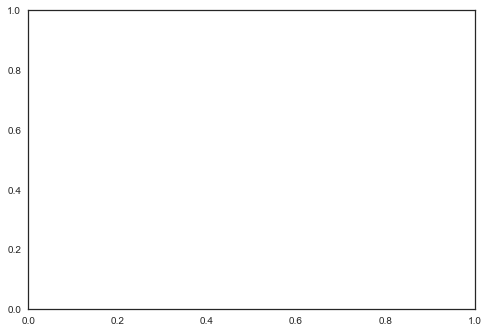

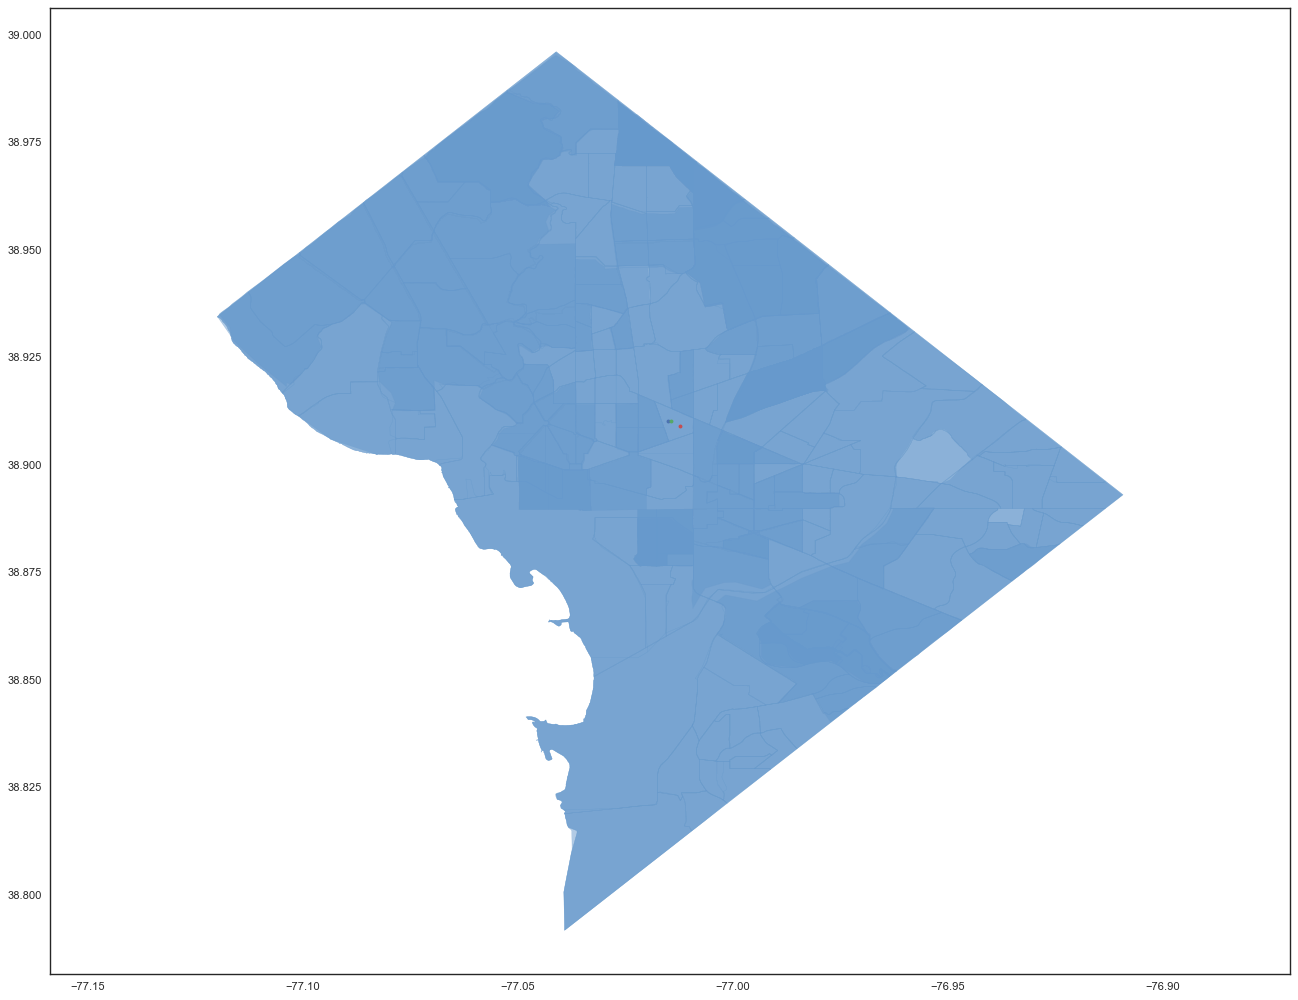

In [11]:

fp = "..\\Geographies\GeoJson\\Census_Tracts_in_2010.geojson"
with open(fp) as f:
    gj = geojson.load(f)
        
url_list = pd.read_csv('..\\Geographies\\GeoJson\\geojson_URL_list.csv')        
BLUE = '#6699cc'
total_pop_variable = 'P0010001'
total_pop_black = 'P0010004'
total_pop_white = 'P0010003'
median_income_variable = 'FAGI_MEDIAN_2015'
variable_center = median_income_variable
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

ii = 0
th = []
for ii in range(len(url_list['geojsonURL'])):
    #print(ii)
    th.append(requests.get(url_list['geojsonURL'][ii]).text)
    gj = geojson.loads(th[ii])
    if ii == 0: 
        try: 
            variable_to_center(gj,'P0010001')
            gj_hold = gj
        except: 
            print('passed') 
            pass
    elif ii == 1:
        try: variable_to_center(gj,'TOTAL00')
        except: 
            print('passed') 
            pass
    elif ii == 2:
        try: variable_to_center(gj,'POPULATION')
        except: 
            print('passed') 
            pass
    elif ii == 3:
        try:variable_to_center(gj,'C7L001')
        except: 
            print('passed') 
            pass
    elif ii == 4:
        try:variable_to_center(gj,'CY7001')
        except: 
            print('passed') 
            pass
    elif ii == 5:
        try:variable_to_center(gj,'CA4001')
        except: 
            print('passed') 
            pass
    elif ii == 6:
        try:variable_to_center(gj,'BZ801')
        except: 
            print('passed') 
            pass
    elif ii == 7:
        try: variable_to_center(gj,'BUB01')
        except: 
            print('passed') 
            pass
    elif ii == 8:
        try: variable_to_center(gj,'BRQ001')
        except: 
            print('passed') 
            pass
    
    ii += 1
        

plt.show()


In [26]:
def base_map(fp):
    feature_list = []

    poly_list = []
    fig_base = plt.figure()
    th.append(requests.get(url_list['geojsonURL'][3]).text)
    gj = geojson.loads(th[ii])
    with open(fp) as f:
        gj = geojson.load(f)
    
    i = 0
    i_end = len(gj['coordinates']) - 1
    for i in range(i_end):
        feature_list.append(gj['coordinates'][i])
        poly_list.append(gj['coordinates'][i]['geometry'])
           #Plotting  
        ax_1 = fig_base.gca() 
        ax_1.add_patch(PolygonPatch(poly_list[i], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
        
    ax_1.axis('scaled')
    plt.show()
    return(fig_base)


fp = "..\\Geographies\GeoJson\\hawaii.geojson"
th = []
a= base_map(fp)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
!ls


2016_sales_20011.csv
Crosswalks
DC Census Tract 2015_11
DC Neighborhood Clusters
DC Wards
GeoJson
MD Census Tract 2015_11
README.md
__pycache__
city-tracts
geocenter on variable.ipynb
geographyFinder.py
hidden_output.csv
hidden_output_lat_lng.csv
ll_to_ward.py
ll_to_ward_ff.py
msScrape
tract_to_ll.py
